In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
#importing the dataset and extracting the independent and dependent variables
companies =pd.read_csv('C:\\Users\\hp i5\\Downloads\\1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values
companies.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

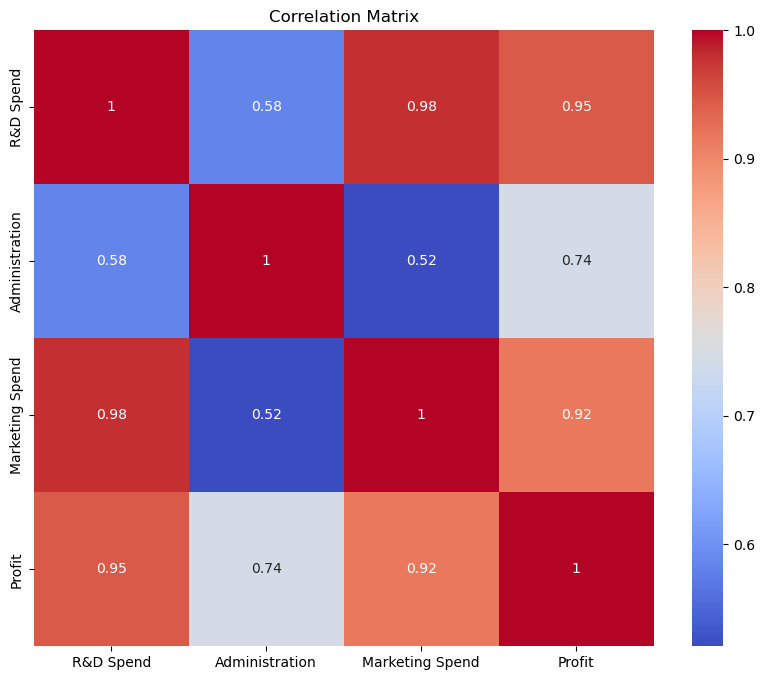

In [7]:
#data visualisation
#building the correlation matrix
# Compute correlation matrix only for numeric columns
corr_matrix = companies.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: adjust the size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
#encoding categorial data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Step 2: One-hot encode the same column using ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'  # Keep all other columns
)

X = ct.fit_transform(X)

# Step 3: Print the final transformed array
print(X[0])

  (0, 996)	1.0
  (0, 999)	1.0
  (0, 1000)	136897.8
  (0, 1001)	471784.1


In [15]:
#avoiding dummy variable trap
X = X[:, 1:]


In [16]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[ 89896.13560404  88562.75109756  94887.30651395 174747.72023756
  84341.06631724 110900.50684928 169762.18978689  91541.67798113
 163730.72563736  54998.21728997  67560.89729515 150188.77595231
 126199.60384888  60116.93668766 175679.15927616  76424.6731863
 118585.29903066 163025.85283588 165373.46410366 180816.33968842
 101611.90106507  85866.61261904 179941.96170712  84375.47086056
 104774.82635513 101085.99176766  41176.34613386  58397.55050945
  69464.05397504 226504.894275   121059.90611405 111345.24805057
 102017.4308966  137860.2144515   64646.58373968 108541.70028035
 184674.67920308 170603.23571996 173734.04591357 118021.40069485
  97366.10933911 163884.28725193 107433.20380238  52036.91225355
 116889.40855343  59427.16827933 157865.17674616  79756.87553344
 159147.37396752 131189.93574075 183744.07931955 173699.64148019
  93763.70569404  79382.62164613 179522.39454767  85546.06327865
 142692.78906429 169618.93124841  85273.34460124 105752.41783686
 141479.40077853  54139.78

In [20]:
# Calculating the Coefficients
print(regressor.coef_)

[ 1.66850593e-07  0.00000000e+00 -3.90842495e-08 ... -9.18374263e-07
  1.04354079e+00  3.55023839e-01]


In [21]:
# Calculating the Intercept
print(regressor.intercept_)

-89058.35581072734


In [22]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8989590247135772